# SIXT33N Project
## Phase 5: PCA/Classificiation - Voice Commands

### EE 16B: Designing Information Devices and Systems II, Spring 2018

Written by Nathaniel Mailoa and Emily Naviasky (2016)

nmailoa@berkeley.edu &emsp; enaviasky@berkeley.edu

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-

## Table of Contents

* [Introduction](#intro)
* [Part 1: Data Collection](#part1)
* [Part 2: Principal Component Analysis](#part2)
* [Part 3: Classification](#part3)
* [Part 4: Launchpad Implementation](#part4)

<a id='intro'></a>
## Introduction

SIXT33N is an obedient little robot that will follow the directions that you tell it. There are four moves that SIXT33N can make: move straight, move straight slowly, turn right, and turn left. However, SIXT33N does not speak human languages, and some words, like "left" and "right", sound very similar (a strong single syllable), while other words are easy to distinguish. Your job in this phase is to find four command words that are easy for SIXT33N to tell apart (consider syllables and intonation).

For phase 3, you will develop the PCA classifier that allows SIXT33N to tell the difference between the four commands. You will examine several different test words, and determine which ones will be easiest to sort by PCA.

Once you have some sample data collected, you will perform PCA and look at how well it separates the sample data. Then, once you have a set of four words that you like, you will use k-means to automatically classify them. When you (and your GSI) are satisfied with the classifier's accuracy, you will port the classifier into the Launchpad code in Energia.

<b>
The goals of this phase are as follows:
- Generate envelope and utilize threshold to get snippets
- PCA + Classifier (4 commands)
- Check accuracy
- PCA projection on Launchpad
</b>

The checkpoints (marked **<span style="color:green">green</span>** in the Notebook) are:
- Checkpoint 1: First pass through PCA with sample data; GSI feedback
- Checkpoint 2: Classification target met in Python

Note that all of this is considered a single graded lab.

<a id='part1'></a>
## <span style="color:blue">Part 1: Data Collection</span>

### Materials
- Microphone front-end circuit
- Launchpad + USB

When humans distinguish words, they listen for temporal and frequency differences to determine what is being said. However, SIXT33N does not have the memory or the processing power to distinguish words nearly as well as our human brains, so we will have to choose much simpler features for SIXT33N to look at (syllables, intonation, magnitude).

When you think of speech signals, you might notice that the shape of the speech wave is a very distinctive part of each word. Taking just the shape of the magnitude of a signal is called enveloping, exemplified in the image below. So, we want to do some filtering to retrieve the envelope of the audio signal. We train the PCA off of just this envelope and build a classifier to classify new data points.

<center>
<img width="400px" src="images/proj-envelope.png">
</center>

<b>Keeping in mind that the words that look most different have different shapes (or different amplitudes varied over time), brainstorm four or five words that you think will sort well. Consider syllables, intonation, and length of the word.</b>

**<span style="color:red">What words are you going to try? Why?</span>** 

In [23]:
'illuminati feedback trump technology'

'illuminati feedback trump technology'

Firstly, upload the sketch <b>`collect-data-envelope.ino`</b> to your Launchpad. This sketch gathers ADC samples every 0.35ms, and streams the data back to the PC.

Next, hook up your front end circuit.<b> Make sure to disconnect the 5V jumper from the Launchpad</b>, or you will power the Launchpad from the power supply as well as from the USB cord. 

<b>Tip: To not lose the jumper, only connect the jumper on one pin so it stays on your launchpad without powering it and creating a connection. Remember to put it back at the end of the lab. The pictures below shows the original configuration of the 5V jumper and modified one for this lab</b> 

<center>
<img width="400px" src="images/msp-jumpers.png">
<img width="400px" src="images/5vjumper.jpg">
</center>


Do not power up your circuit for now, we will connect the appropriate Launchpad pins to your circuit first:
- P6.0 to the microphone front end circuit output
- 3.3V pin to the 3.3V power rail of the breadboard (in particular to supply the buffer op-amp)
- 5V pin to the 5V row where your MicBoard V_DD is located
- GND pin to the ground rail of the breadboard

You can keep your MSP plugged via USB as long as <b>YOUR JUMPER IS DISCONNECTED</b>

Next, use the bench power supply to provide 5V to the circuit. **<span color='red'>DO NOT FORGET TO SET THE CURRENT LIMIT.</span>** <b>Before you start recording, use the oscilloscope to probe the output of the microphone circuit. Make sure the waveform averages to 1.65V (halfway between 0V and 3.3V) and the amplitude is large enough.</b> Make a noise at the microphone; you should see the signal change to reflect the sound you just made. If you are close enough or loud enough, you should be able to get the peak-to-peak amplitude of your signal all the way up to 3.3V.

<center>
<img width="400px" src="images/proj-waveform.png">
</center>

"Good" Audio data has a high signal to noise ratio. Recording words while far away from the microphone may cause your intended word to blend in with background noise. However "oversaturation" of the audio signal (speaking too loudly and/or too closely into the mic) will distort the signal (Why?). You can use the oscilloscope on the front-end output to test for over/under saturation.

You should already have <b>`collect-data-envelope.ino`</b> uploaded to your Launchpad. This sketch will turn on the red Launchpad LED to show that it is recording. The Launchpad will record 2 seconds of audio at a time, sampled every 0.35ms. 

<b>The red LED on the launch pad is like a recording room. When the red light goes on, the Launchpad is recording. Say the word you want to record before the red LED turns off.</b>

To make your life easier, pronounce the words consistently. Try <b>five or six words</b> that you think will classify well. The Launchpad will apply an enveloping function (discussed later) which reduces the data from several thousand samples to 172 samples. 

The Launchpad has limited memory and will delete the enveloped data as soon as the red light flashes again. To record the data permanently, the Launchpad must be connected to a PC by the USB, allowing it to transfer its data

To transfer the data in the PC, make sure the Launchpad is connected, then run:

<b>`python collect-data-envelope.py log.csv`</b>

Now, each time the light flashes and a sample is collected by the Launchpad, it will be written into to some file called `log.csv`. You might want to probe the output and watch the scope while you collect. After you collect, a few test words, check the `log.csv` and make sure that it looks like a sound wave and is not just full of zeros. It might help to plot the data on excel to make sure.

Now the Launchpad will send the audio data to the PC in addition to collecting and enveloping it. The python script will write into an excel file called `log.csv`, one enveloped sample per row. After collection, make sure the tables are not filled with zeroes.


<b>Collect around 15 good samples for each of your four to five words</b>, and be sure to save them to different .csv files with descriptive names. You will collect more once you settle on the four words that sort well enough.

Just in case: To write to different .csv files, just change `log.csv` to `TheWordYouWant.csv` in <b>`python collect-data-envelope.py log.csv`</b>.

#### For your Consideration:

Once you have your four or more words collected, you can move onto the PCA classification below. You may realize in the next section that one or two of your words are not sorting quite as well as you would like. Don't be afraid to come back to this section and try collecting different words based on what you have learned makes a word sortable. 


**<span style="color:red"> Summary TO DO for part 1: </span>** 
- **<span style="color:red">Keep MSP powered via USB</span>**
- **<span style="color:red">Disconnect 5V jumper from Launchpad</span>**
- **<span style="color:red">Connect P6.0 to the microphone front end circuit output</span>**
- **<span style="color:red">Connect 3.3V pin of the launchpad to the 3V power rail of the breadboard (in particular to supply the buffer op-amp) </span>**
- **<span style="color:red">Connect the 5V pin of the launchpad to V_DD of micboard and supply 5V from the power supply (remember to set the current limit!)</span>**
- **<span style="color:red">Connect the GND pin of the launchpad to the ground rail of the breadboard</span>**
- **<span style="color:red">Upload `collect-data-envelope.ino` onto launchpad</span>**
- **<span style="color:red">Run `python collect-data-envelope.py log.csv` on your PC to collect data into `log.csv`</span>**
- **<span style="color:red">Record 15 samples for each of your 4 to 5 words (Saying your word each time the red light flashes)</span>**

<a id='part2'></a>
## <span style="color:blue">Part 2: Principal Component Analysis</span>

Before we can use the recorded data for PCA, we must first process the data. It is not necessary for you to understand the enveloping function well enough to implement it (since we have already done it for you), but just in case you are curious the enveloping function is described in the following pseudocode:

<code><b>Enveloping function</b>
Divide the whole signal to a block of 16 samples
For each chunk:
    Find the mean of the chunk
    Subtract each sample by the mean
    Find the sum of the absolute value of each sample
</code>

What you really need to know, however, is what the enveloped signal looks like for each word. Spend a little time looking at the data you just collected in the python plots below.

First, load the recorded data from the csv files.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.cluster
import csv
%matplotlib inline

In [4]:
def read_csv(filename):
    data = []
    with open(filename, 'r') as csvfile:
        r = csv.reader(csvfile, delimiter=' ')
        for row in r:
            data.append([float(i) for i in row[0].split(',')])
    return np.array(data)

In [5]:
# Load data from csv
# YOUR CODE HERE
word1_raw = read_csv("illuminati.csv")
word2_raw = read_csv("feedback.csv")
word3_raw = read_csv("trump.csv")
word4_raw = read_csv("technology.csv")

# Take the same number of readings for all words to be fair
num_samples = min(np.shape(word1_raw)[0], np.shape(word2_raw)[0], np.shape(word3_raw)[0], np.shape(word4_raw)[0])
word1_raw = word1_raw[:num_samples,:]
word2_raw = word2_raw[:num_samples,:]
word3_raw = word3_raw[:num_samples,:]
word4_raw = word4_raw[:num_samples,:]

Plot your data and get a feel for how it looks enveloped.

**<span style="color:red">Important: It's okay if the data isn't aligned. The code in the next part will automatically align the data.</span>** 

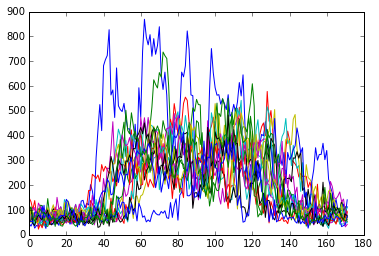

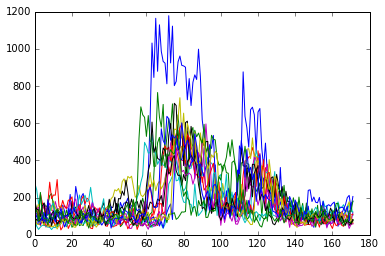

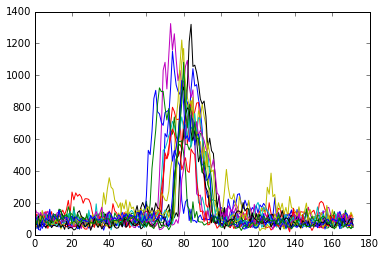

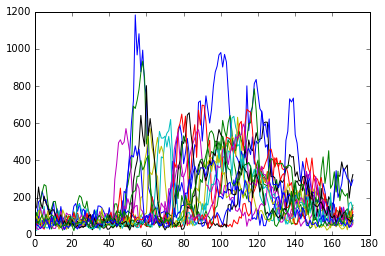

In [6]:
# Plot all word1 samples
plt.plot(word1_raw.T)
plt.show()
plt.plot(word2_raw.T)
plt.show()
plt.plot(word3_raw.T)
plt.show()
plt.plot(word4_raw.T)
plt.show()

As you can see above, the speech is only a small part of the 2 second window, and each sample starts at different times. PCA is not good at interpreting delay, so we need to somehow start in the same place each time and capture a smaller segment of the 2 second sample where the speech is present. To do this, we will use a thresholding algorithm.

First, we define a **`threshold`** relative to the maximum value of the data. We say that any signal that crosses the threshold is the start of a speech command. In order to not lose the first couple samples of the speech command, we say that the command starts **`pre_length`** samples before the threshold is crossed. We then take a window of the data that is **`length`** long, and try to capture the entire sound of the command in that window.

<b>Play around with the parameters `length`, `pre_length` and `threshold`</b> in the cells below to find appropriate values corresponding to your voice and chosen commands. You should see the results and how much of your command you captured in the plots generated below. When you are satisfied, note down the values of `length`, `pre_length` and `threshold` - <b>you will need to add them to the Launchpad sketch later.</b>

In [7]:
def get_snippets(data, length, pre_length, thres):
    data_out = np.zeros((np.shape(data)[0], length))
    
    for rnum, row in enumerate(data):
        # Find the threshold
        row_thres = thres*np.max(row)

        # Figure out when interesting snippet starts
        block = pre_length
        while (row[block] < row_thres):
            block = block + 1
        block = min(block, 172 - length)
        data_out[rnum,:] = row[block-pre_length:block-pre_length+length]
        
        # Normalization
        data_out[rnum,:] = data_out[rnum,:] / np.sum(data_out[rnum,:])
        
    return data_out

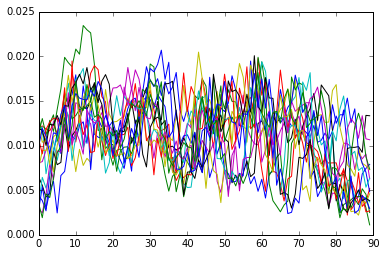

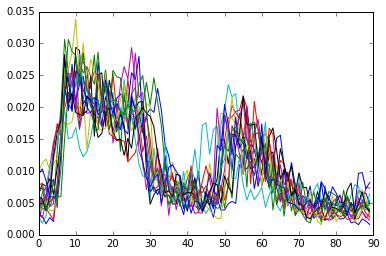

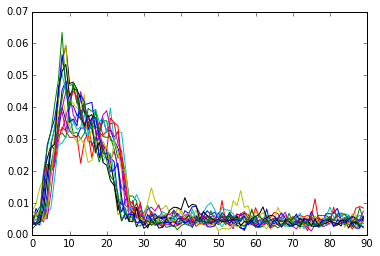

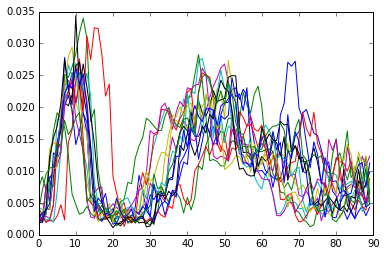

In [8]:
length = 90        # Adjust this
pre_length = 7     # Adjust this
threshold = 0.7    # Adjust this

word1_processed = get_snippets(word1_raw, length, pre_length, threshold)
plt.plot(word1_processed.T)
plt.show()
plt.figure()
word2_processed = get_snippets(word2_raw, length, pre_length, threshold)
plt.plot(word2_processed.T)
plt.show()
word3_processed = get_snippets(word3_raw, length, pre_length, threshold)
plt.plot(word3_processed.T)
plt.show()
plt.figure()
word4_processed = get_snippets(word4_raw, length, pre_length, threshold)
plt.plot(word4_processed.T)
plt.show()

You should now see a mostly organized set of samples for each word. Can you tell the which word is which just by the envelope? Can you tell them apart? If you can't tell the words apart, then PCA will have a difficult time as well.

Now that we have our data in a nice format, we can build the PCA input matrix from that data. The function <b>`np.vstack`</b> might be helpful here.


In [9]:
# YOUR CODE HERE #
processed_A = np.vstack((word1_processed,word2_processed,word3_processed,word4_processed))
processed_A

array([[ 0.00437703,  0.00383532,  0.00268689, ...,  0.0068039 ,
         0.00743229,  0.00788732],
       [ 0.01323239,  0.01135568,  0.01056047, ...,  0.0044214 ,
         0.00302182,  0.0011133 ],
       [ 0.01177997,  0.01218971,  0.01184826, ...,  0.00317547,
         0.0036535 ,  0.00519002],
       ..., 
       [ 0.00179941,  0.00205647,  0.00411293, ...,  0.00668352,
         0.0080545 ,  0.00981106],
       [ 0.00252733,  0.00335146,  0.00384594, ...,  0.01131806,
         0.00741717,  0.01126312],
       [ 0.00382883,  0.00693694,  0.0095045 , ...,  0.00689189,
         0.01054054,  0.00477477]])

Write code below to perform SVD on your matrix A (is there a function in one of our libraries that can help?), plot the sigma values, and project on to the principal components. First zero-mean your data as `demeaned_A`.

In [10]:
# Zero-mean the matrix A. Note down the mean for the Launchpad code
# YOUR CODE HERE #
mean_vec = np.mean(processed_A,0)
demeaned_A = processed_A - np.dot(np.ones((len(processed_A),len(processed_A))),processed_A)/len(processed_A)

In [22]:
mean_vec

array([ 0.0053532 ,  0.00572896,  0.00601331,  0.00792492,  0.01073427,
        0.01415807,  0.01741638,  0.02398926,  0.02564078,  0.02525986,
        0.02485079,  0.02448398,  0.02332551,  0.02210676,  0.02070058,
        0.01921335,  0.01857841,  0.0176469 ,  0.01693594,  0.0161855 ,
        0.01556385,  0.01497832,  0.01447814,  0.0136406 ,  0.01259774,
        0.01184542,  0.01104993,  0.01092337,  0.01078859,  0.01003128,
        0.00948302,  0.00948225,  0.00984921,  0.00902584,  0.00888336,
        0.00863901,  0.00866091,  0.00854405,  0.00912329,  0.00899948,
        0.0094364 ,  0.00983219,  0.00990984,  0.01054062,  0.01073293,
        0.01092398,  0.01073248,  0.01044187,  0.0106949 ,  0.01116267,
        0.01154799,  0.01233112,  0.01233716,  0.01226055,  0.01179762,
        0.01152569,  0.01138554,  0.01110376,  0.01114774,  0.01099695,
        0.01083192,  0.01022784,  0.00973291,  0.00936896,  0.00847534,
        0.00861621,  0.00821308,  0.00835212,  0.00836312,  0.00

In [11]:
# Take the SVD of matrix demeaned_A
# YOUR CODE HERE #
U,S,V = np.linalg.svd(demeaned_A)

<Container object of 3 artists>

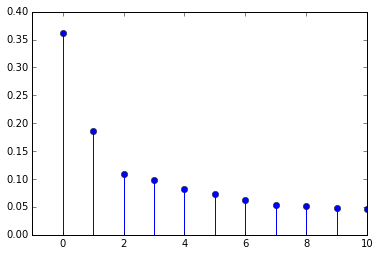

In [12]:
# Plot out the sigma values (Hint: Use plt.stem for a stem plot)
# YOUR CODE HERE #
plt.xlim([-1,10])
plt.stem(S)

Take a look at your sigma values. They should show you very clearly how many principal components you need.

**<span style="color:red">How many principal components do you need? Given that you are sorting 4 words, what is the the number you expect to need?</span>** 

There is no correct answer here. We can pick as many principal components onto which we project our data to get the "best" separation (most variance), but at some point, the cost-benefit isn't worth selecting an extra basis vector. For example, in our project, we are loading these basis vectors onto the [MSP430 Launchpad](http://www.ti.com/tool/MSP-EXP430F5529LP), and we can only store 2-3 principal components before we run into memory issues.

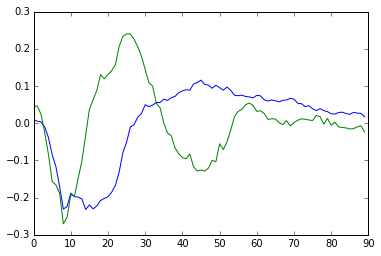

In [13]:
# Plot the principal component(s)
# YOUR CODE HERE #
new_basis = V[:2].T        # This should be the basis containing your principal components
plt.plot(new_basis)

In [16]:
new_basis

array([[ 0.00899097,  0.04416722],
       [ 0.00561217,  0.04658042],
       [ 0.00363569,  0.02368366],
       [-0.01055335, -0.02558988],
       [-0.03906339, -0.08404109],
       [-0.08494901, -0.15709971],
       [-0.11677893, -0.16566311],
       [-0.17074685, -0.18832668],
       [-0.23094303, -0.27057825],
       [-0.22389627, -0.25299553],
       [-0.18797845, -0.19283048],
       [-0.19751628, -0.19606703],
       [-0.19864463, -0.14709146],
       [-0.2037736 , -0.10125801],
       [-0.23197992, -0.0319256 ],
       [-0.21958967,  0.03722647],
       [-0.23030794,  0.06321843],
       [-0.22210908,  0.08837951],
       [-0.20787395,  0.13065594],
       [-0.20209397,  0.11925212],
       [-0.19792209,  0.13117801],
       [-0.18535966,  0.14140614],
       [-0.16675083,  0.15758746],
       [-0.13125216,  0.20643801],
       [-0.0789998 ,  0.2329083 ],
       [-0.05117317,  0.24008372],
       [-0.01056394,  0.23955257],
       [-0.0041902 ,  0.22604845],
       [ 0.01621207,

Now project the data in the matrix A onto the new basis and plot it. Do you see clustering? Do you think you can separate the data easily? If not, you might need to try new words.

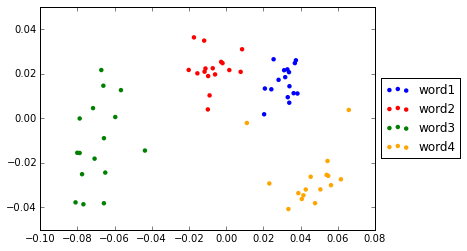

In [30]:
# Project the data onto the new basis
# YOUR CODE HERE #
proj = np.dot(demeaned_A,new_basis) 

plt.scatter(proj[0:num_samples,0], proj[0:num_samples,1], c=['blue'], edgecolor='none')
plt.scatter(proj[num_samples:num_samples*2,0], proj[num_samples:num_samples*2,1], c=['red'], edgecolor='none')
plt.scatter(proj[num_samples*2:num_samples*3,0], proj[num_samples*2:num_samples*3,1], c=['green'], edgecolor='none')
plt.scatter(proj[num_samples*3:num_samples*4,0], proj[num_samples*3:num_samples*4,1], c=['orange'], edgecolor='none')
plt.legend(['word1', 'word2', 'word3', 'word4'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


<span style="color:green">**First pass through PCA with sample data.** Show your GSI the result of the projection and talk about how you might be able to improve the result.</span>

Your data might look noisy, and might not classify perfectly. That is completely okay, we are just looking for good enough. Like many AI applications, this is noisy data that we are classifying so some error in classification is okay. The important part is if you think that you can see some clustering. 

Once you think you have decent clustering, you can move on to getting your code to automate classification and you will make up for some of the error there, too.

**<span style="color:red">Summary TO DO for Part 2</span>** 
- **<span style="color:red">Load words from CSV</span>** 
- **<span style="color:red">Plot the your enveloped words and make sure they are distinguishable. Else re-record words</span>** 
- **<span style="color:red">Play around with `length`, `prelength` and `threshold` until you settle on desirable values</span>** 
- **<span style="color:red">Construct the A matrix from data</span>** 
- **<span style="color:red">Further process the A matrix (hint hint: De-mean it)</span>** 
- **<span style="color:red">Take the SVD of A and plot the sigma values - how many principal components do you need ? </span>** 
- **<span style="color:red">Project data from A matrix onto selected number of principal components (should you use U or V)</span>** 
- **<span style="color:red">Plot the projections</span>** 
- **<span style="color:red">Make sure that the projected data clusters properly. If clustering is not apparent. re-collect data. </span>** 

<a id='part3'></a>
## <span style="color:blue">Part 3:  K-Means Classification</span>

Using the plot above, we will define a way of classifying the different words. Fill in the skeleton code below to classify a vector in your new basis. 

Use a few of speech samples you collected at the beginning and test your classification on them. <b>Don't forget to do the same processing on these samples that you trained with</b> (i.e. do zero-mean by subtracting the mean of the original matrix A).

You will use k-means to classify, just as you did in the your BMI homework question. If you need a refresher, you can check the python documentation for the function **`scipy.cluster.vq.kmeans`** <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html#scipy.cluster.vq.kmeans">here</a>.

You need to be a little careful when creating the classifying algorithm since we do not want SIXT33N to pick up random sounds and treat them as one of the commands. To do this, pick a reasonably tight boundary for your classification.

**<span style="color:red"> Note: The order in which the centroids is returned is nondeterministic - save the centroid values and matching word somewhere safe. When you rerun find_centroids you may need to go back and reassign your matching word!!!!</span>** 


In [31]:
def find_centroids(clustered_data, num_of_clusters):
    """ Use scipy.cluster.vq.kmeans to determine centroids of clusters
    Parameters:
        clustered_data: the data already projected onto the new basis
        num_of_clusters: the expected number of clusters in the data
    Returns: 
        The centroids of the clusters
    Note: You do NOT need to call the whiten function
    """
    return scipy.cluster.vq.kmeans(clustered_data,num_of_clusters)

In [32]:
# Determine the centroids of each cluster
# YOUR CODE HERE
centroids = find_centroids(proj,4)
print(centroids)

(array([[ 0.03197428,  0.01439462],
       [ 0.0461015 , -0.03072628],
       [-0.00725541,  0.02211973],
       [-0.06905446, -0.01142818]]), 0.012360458911908206)


The first centroid is at: [ 0.03197428  0.01439462]
The second centroid is at: [-0.00725541  0.02211973]
The third centroid is at: [-0.06905446 -0.01142818]
The fourth centroid is at: [ 0.0461015  -0.03072628]


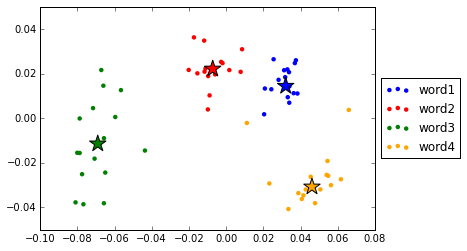

In [38]:
# The output ordering of k-means is non-deterministic,
# so we have one cell (above) that runs it, and another (this one)
# that orders the result

# YOUR CODE HERE
centroid1 = centroids[0][0]
centroid2 = centroids[0][2]
centroid3 = centroids[0][3]
centroid4 = centroids[0][1]
centroid_list = np.vstack([centroid1, centroid2, centroid3, centroid4])

print('The first centroid is at: ' + str(centroid1))
print('The second centroid is at: ' + str(centroid2))
print('The third centroid is at: ' + str(centroid3))
print('The fourth centroid is at: ' + str(centroid4))

plt.scatter(proj[0:num_samples,0], proj[0:num_samples,1], c=['blue'], edgecolor='none')
plt.scatter(proj[num_samples:num_samples*2,0], proj[num_samples:num_samples*2,1], c=['red'], edgecolor='none')
plt.scatter(proj[num_samples*2:num_samples*3,0], proj[num_samples*2:num_samples*3,1], c=['green'], edgecolor='none')
plt.scatter(proj[num_samples*3:num_samples*4,0], proj[num_samples*3:num_samples*4,1], c=['orange'], edgecolor='none')

plt.scatter(centroid_list[:,0], centroid_list[:,1], c=['blue', 'red', 'green', 'orange'], marker='*', s=300)
plt.legend(['word1', 'word2', 'word3', 'word4'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
def classify(data_point):
    """
    Classifies a new reading vector into a word.
    Inputs:
        data_point: new data point vector (before projection)
    Output:
        Word number
    """
    proj = np.dot(data_point,new_basis)
    distances = [sum((proj-centroid)**2)**0.5 for centroid in centroid_list]
    return np.argmin(distances) + 1

In [42]:
# Try out the classification function
print(classify(demeaned_A[10,:])) # Modify to use other vectors

2


**Our goal is 80% accuracy for each word.** Write code to apply the `classify` function to each sample and compute the accuracy for each word.

In [44]:
# Try to classify the whole A matrix
correct_counts = np.zeros(4)

for (row_num, data) in enumerate(demeaned_A):
    if (row_num//num_samples) + 1 == classify(data):
        correct_counts[row_num//num_samples] += 1

for i in range(len(correct_counts)):
    print("Percent correct of word {} = {}".format(i, correct_counts[i]/num_samples))

Percent correct of word 0 = 1.0
Percent correct of word 1 = 1.0
Percent correct of word 2 = 1.0
Percent correct of word 3 = 0.875


**<span style="color:red">Summary TO DO for Part 3:</span>** 
- **<span style="color:red">Fill in function to find the centroids of the clustered data - K Means will output them in a nondeterministic order</span>** 
- **<span style="color:red">Fill in function to classify the words - make sure you apply the same preprocessing to the words (demeaning)</span>** 
- **<span style="color:red">Make sure you have an 80% classification rate for each word. Else you need to re-collect data</span>** 